
# Run Sirepo/Shadow simulations with Bluesky

This section is based on the **basic** example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" Shadow simulations

In this example, we run a single Shadow simulation and collect the resulting averaged intensity and corresponding 2D intensity distribution from the "Watchpoint" report on the "Beamline" page of Sirepo/Shadow app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.shadow_detector import SirepoShadowDetector

shadow_det = SirepoShadowDetector(
    name="shadow_det",
    sim_id="00000001",
    sim_report_type="default_report",
    sirepo_server="http://localhost:8000",
    root_dir="/tmp/sirepo-bluesky-data",
)

shadow_det.select_optic("Aperture")
shadow_det.create_parameter("horizontalSize")
shadow_det.create_parameter("verticalSize")
shadow_det.read_attrs = ["image", "mean"]
shadow_det.configuration_attrs = ["horizontal_extent", "vertical_extent", "shape"]

shadow_det.active_parameters["Aperture_horizontalSize"].set(1.0)
shadow_det.active_parameters["Aperture_verticalSize"].set(1.0)
shadow_det.duration.kind = "hinted"

uid, = RE(bp.count([shadow_det]))



Transient Scan ID: 1     Time: 2022-10-27 19:10:49
Persistent Unique Scan ID: 'd8c3a0eb-1400-46ed-abb0-5042531b6c4c'


New stream: 'primary'
+-----------+------------+-----------------+---------------------+
|   seq_num |       time | shadow_det_mean | shadow_det_duration |
+-----------+------------+-----------------+---------------------+
|         1 | 19:10:54.1 |           9.752 |               4.127 |
+-----------+------------+-----------------+---------------------+
generator count ['d8c3a0eb'] (scan num: 1)





We can access the data as the last item in the database (`db[-1]`) or directly via the returned `uid`, which when plotted as an image will look like:

In [2]:
hdr = db[uid]
imgs = np.array(list(hdr.data(f'{shadow_det.name}_image')))

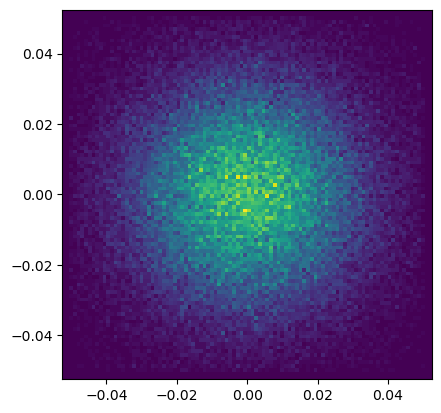

In [3]:
cfg = hdr.config_data(shadow_det.name)["primary"][0]
hor_ext = cfg[f"{shadow_det.name}_horizontal_extent"]
vert_ext = cfg[f"{shadow_det.name}_vertical_extent"]
plt.imshow(imgs[0], aspect="equal", extent=(*hor_ext, *vert_ext))